In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading input csv file for preprocessing
data=pd.read_csv("C:/Users/deepesh/Downloads/train_v9rqX0R.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data.shape

(8523, 12)

In [4]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


# missing value handling

In [6]:
# Filling missing values in 'Item_Weight' column with median 
for i in ['Item_Weight']:
    data[i]=data[i].fillna(data[i].dropna().median())

In [7]:
data['Item_Weight'].isna().sum()

0

In [8]:
#Checking values in 'Outlet_size' column
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [9]:
# Finding percentage of missing values 
missing_data_per=(data['Outlet_Size'].isna().sum()/data.shape[0])*100

In [10]:
missing_data_per

28.27642848762173

In [11]:
# Finding out mode & Filling null values with Mode
data['Outlet_Size'].mode()

0    Medium
dtype: object

In [12]:
for i in ["Outlet_Size"]:
    data[i]=data[i].fillna('Medium')

In [13]:
data['Outlet_Size'].isna().sum()

0

# Exploratory data analysis

In [14]:
# Check for duplicates in item identifier
idsTotal = data.shape[0]
idsDupli = data[data['Item_Identifier'].duplicated()]
print(f'There are {len(idsDupli)} duplicate IDs for {idsTotal} total entries')

There are 6964 duplicate IDs for 8523 total entries


In [15]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [16]:
data['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [17]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [18]:
data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [19]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [20]:
data['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [21]:
data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [22]:
data['Outlet_Type'].unique()            

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [23]:
data['Outlet_Age']= data['Outlet_Establishment_Year'].apply(lambda year:2022-year)

In [24]:
data['Outlet_Age'].head()

0    23
1    13
2    23
3    24
4    35
Name: Outlet_Age, dtype: int64

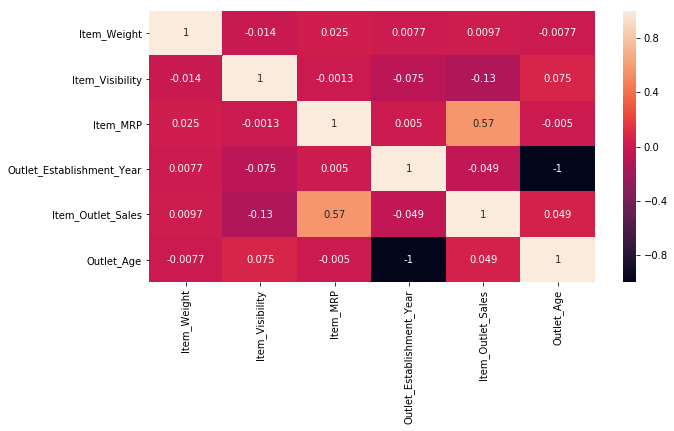

In [25]:
import seaborn as sns
corr_matrix=data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corr_matrix,annot=True)

In [26]:
data1=data.drop(['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],axis=1)

In [27]:
data1.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Outlet_Age'],
      dtype='object')

In [28]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
Item_Weight             8523 non-null float64
Item_Fat_Content        8523 non-null object
Item_Visibility         8523 non-null float64
Item_Type               8523 non-null object
Item_MRP                8523 non-null float64
Outlet_Size             8523 non-null object
Outlet_Location_Type    8523 non-null object
Outlet_Type             8523 non-null object
Item_Outlet_Sales       8523 non-null float64
Outlet_Age              8523 non-null int64
dtypes: float64(4), int64(1), object(5)
memory usage: 665.9+ KB


In [29]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
for i in ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']:
    data1[i]=label_encode.fit_transform(data1[i])

In [30]:
data1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.30,0,0.016047,Dairy,249.8092,1,0,Supermarket Type1,3735.1380,23
1,5.92,1,0.019278,Soft Drinks,48.2692,1,2,Supermarket Type2,443.4228,13
2,17.50,0,0.016760,Meat,141.6180,1,0,Supermarket Type1,2097.2700,23
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1,2,Grocery Store,732.3800,24
4,8.93,0,0.000000,Household,53.8614,0,2,Supermarket Type1,994.7052,35


In [31]:
data2=pd.get_dummies(data1)

In [32]:
data2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,23,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,13,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,23,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,24,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,35,0,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
Item_Weight             8523 non-null float64
Item_Fat_Content        8523 non-null int32
Item_Visibility         8523 non-null float64
Item_Type               8523 non-null object
Item_MRP                8523 non-null float64
Outlet_Size             8523 non-null int32
Outlet_Location_Type    8523 non-null int32
Outlet_Type             8523 non-null object
Item_Outlet_Sales       8523 non-null float64
Outlet_Age              8523 non-null int64
dtypes: float64(4), int32(3), int64(1), object(2)
memory usage: 566.1+ KB


In [34]:
tr_data=data1.drop(['Item_Type','Outlet_Type'],axis=1)

In [35]:
#seperating features and Target field
x=tr_data.drop('Item_Outlet_Sales',axis=1)
y=tr_data['Item_Outlet_Sales']

In [36]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 7 columns):
Item_Weight             8523 non-null float64
Item_Fat_Content        8523 non-null int32
Item_Visibility         8523 non-null float64
Item_MRP                8523 non-null float64
Outlet_Size             8523 non-null int32
Outlet_Location_Type    8523 non-null int32
Outlet_Age              8523 non-null int64
dtypes: float64(3), int32(3), int64(1)
memory usage: 366.3 KB


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [40]:
from sklearn.metrics import mean_squared_error,r2_score
print("MSE=",mean_squared_error(predictions,y_test))

MSE= 1781324.358056941


In [41]:
from sklearn.linear_model import Lasso
 
# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)
 
# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
 
print(lasso_coeff)

Mean squared error on test set 1778915.2038785527
                Columns  Coefficient Estimate
0           Item_Weight             -3.623537
1      Item_Fat_Content             69.454698
2       Item_Visibility          -4135.086849
3              Item_MRP             15.572930
4           Outlet_Size           -109.009917
5  Outlet_Location_Type            127.230621
6            Outlet_Age             11.384636


In [42]:
# reading test data set
test_data=pd.read_csv("C:/Users/deepesh/Downloads/test_AbJTz2l.csv")
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [43]:
test_data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT017', 'OUT010', 'OUT027', 'OUT046', 'OUT018',
       'OUT045', 'OUT019', 'OUT013', 'OUT035'], dtype=object)

In [44]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [45]:
# Filling missing values in 'Item_Weight' column with median 
for i in ['Item_Weight']:
    test_data[i]=test_data[i].fillna(test_data[i].median())

In [46]:
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [47]:
test_data['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [48]:
# Finding out mode & Filling null values with Mode
test_data['Outlet_Size'].mode()

0    Medium
dtype: object

In [49]:
for i in ['Outlet_Size']:
    test_data[i]=test_data[i].fillna('Medium')

In [50]:
test_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [51]:
test_data['Outlet_Age']= test_data['Outlet_Establishment_Year'].apply(lambda year:2022-year)

In [52]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 12 columns):
Item_Identifier              5681 non-null object
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
Outlet_Age                   5681 non-null int64
dtypes: float64(3), int64(2), object(7)
memory usage: 532.7+ KB


In [53]:
test_data1=test_data.drop(['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],axis=1)

In [54]:
for i in ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']:
    test_data1[i]=label_encode.fit_transform(test_data1[i])

In [55]:
test_data2=pd.get_dummies(test_data1)

In [56]:
test_data3=test_data1.drop(['Item_Type','Outlet_Type'],axis=1)

In [57]:
test_data3.shape

(5681, 7)

In [58]:
test_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
Item_Weight             5681 non-null float64
Item_Fat_Content        5681 non-null int32
Item_Visibility         5681 non-null float64
Item_MRP                5681 non-null float64
Outlet_Size             5681 non-null int32
Outlet_Location_Type    5681 non-null int32
Outlet_Age              5681 non-null int64
dtypes: float64(3), int32(3), int64(1)
memory usage: 244.2 KB


In [59]:
#predictions using linear regression model
predictions=model.predict(test_data3)

In [60]:
df=pd.DataFrame(predictions)
df['Item_Outlet_Sales'] = predictions
df.drop(0,axis=1,inplace=True)
df.head()

,Item_Outlet_Sales
0,1817.178285
1,1667.887185
2,3777.777428
3,2602.614133
4,3808.736209


In [61]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,23
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,15
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,24
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,15
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,37


In [62]:
test_data4=pd.concat([test_data,df],axis=1)

In [63]:
test_data4.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Outlet_Age', 'Item_Outlet_Sales'],
      dtype='object')

In [64]:
test_data4.drop('Outlet_Age',axis=1,inplace=True)

In [65]:
test_data4.shape

(5681, 12)

In [66]:
test_data4=test_data4.drop(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type', 'Item_MRP','Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type','Outlet_Type'],axis=1)

In [67]:
test_data4.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1817.178285
1,FDW14,OUT017,1667.887185
2,NCN55,OUT010,3777.777428
3,FDQ58,OUT017,2602.614133
4,FDY38,OUT027,3808.736209


In [68]:
#saving as linear regression test data prediction as csv file
test_data4.to_csv('big_mart_test.csv',index=False)

In [70]:
#lasso regression prediction
predictions_lasso = lasso.predict(test_data3)

In [71]:
df1=pd.DataFrame(predictions_lasso)
df1['Item_Outlet_Sales'] = predictions_lasso
df1.drop(0,axis=1,inplace=True)
df1.head()

,Item_Outlet_Sales
0,1793.192650
1,1635.297442
2,3785.938109
3,2580.280445
4,3815.167321


In [72]:
test_data7=pd.concat([test_data,df1],axis=1)

In [73]:
test_data7.drop('Outlet_Age',axis=1,inplace=True)

In [74]:
test_data7.shape

(5681, 12)

In [75]:
test_data8=test_data7.drop(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type', 'Item_MRP','Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type','Outlet_Type'],axis=1)

In [76]:
#saving as lasso regession test predictions as csv file
test_data8.to_csv('big_mart_test1.csv',index=False)

In [77]:
test_data8.shape

(5681, 3)